# InSituParse - Visualize data with napari and crop datasets

Example dataset: https://www.10xgenomics.com/products/xenium-in-situ/preview-dataset-human-breast

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [35]:
from xeniumdata import XeniumData
import xeniumdata
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from xeniumdata.utils.utils import decode_robust_series
from dask_image.imread import imread
from xeniumdata.images import deconvolve_he

## Integrate HE images into Xenium data structure

Idea:
1. Place HE images into folder close to the xenium output files
2. Register images using SIFT algorithm and extract transformation matrix (for Xenium Explorer).
3. Save registered images in Xenium folder and include information about image paths into the `experiment.xenium` file and generate a separate `experiment_he.xenium` file to prevent problems with xenium explorer.

In [3]:
# input directories
data_dir = Path("C:/Users/ge37voy/data/datasets/Xenium_FFPE_Human_Breast_Cancer_Rep1_outs/output-XETG00000__slide_id__sample_id/")
img_dir = Path("C:/Users/ge37voy/data/datasets/Xenium_FFPE_Human_Breast_Cancer_Rep1_outs/unregistered_images/")

In [4]:
# load xenium data
xd = XeniumData(data_dir)

In [28]:
he_dir = list(img_dir.glob("*.tif"))[0]
#he_dir = r"C:\Users\ge37voy\data\2301_CRC\2301-01_20230504\01_xenium_data\unregistered_images\0003621__Region_1__HE.tif"

In [29]:
he = imread(he_dir)

In [31]:
he[0]

dask.array<getitem, shape=(20511, 27587, 3), dtype=uint8, chunksize=(20511, 27587, 3), chunktype=numpy.ndarray>

In [32]:
hecrop = he[0][10000:11000, 10000:11000]

In [33]:
hecrop

dask.array<getitem, shape=(1000, 1000, 3), dtype=uint8, chunksize=(1000, 1000, 3), chunktype=numpy.ndarray>

(array([  23120.,   25657.,   39293.,   60934.,   87492.,  116577.,
         204466.,  468253.,  828302., 1145906.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

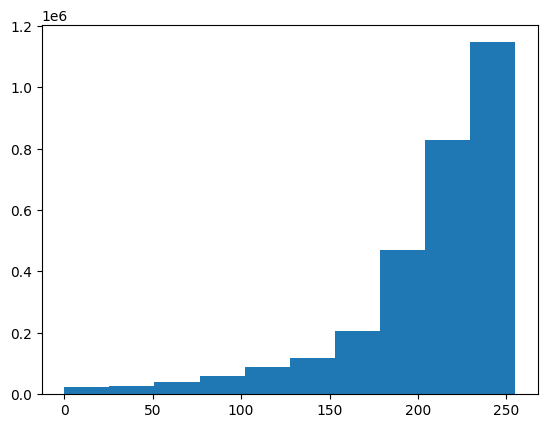

In [45]:
plt.hist(hecrop.compute().flatten())

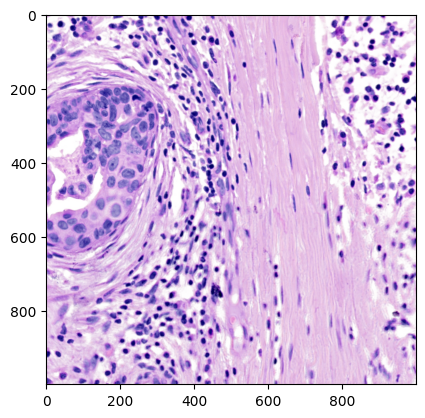

In [34]:
plt.imshow(hecrop.compute())

In [37]:
hema, _, _ = deconvolve_he(hecrop)

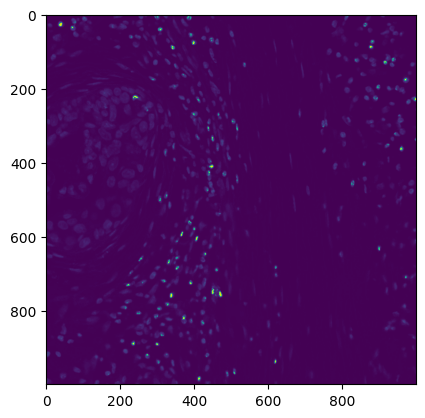

In [40]:
plt.imshow(hema)

In [15]:
xd

XeniumData
Slide ID:	slide_id
Region ID:	sample_id
Data path:	C:\Users\ge37voy\data\datasets\Xenium_FFPE_Human_Breast_Cancer_Rep1_outs
Data folder:	output-XETG00000__slide_id__sample_id
Metadata file:	experiment_modified.xenium

In [12]:
xd.register_images(img_dir=img_dir, img_suffix=".tif")

Processing path C:\Users\ge37voy\data\datasets\Xenium_FFPE_Human_Breast_Cancer_Rep1_outs\output-XETG00000__slide_id__sample_id
	Only unmodified metadata file (`experiment.xenium`) found. Information will be added to new file (`experiment_modified.xenium`).
	Processing "HE" image
		Loading images...
		Run color deconvolution
		Extract common features from image and template
		Rescale image and template to save memory.
Rescaled to following dimensions: (3448, 4638)
Rescaled to following dimensions: (3412, 4688)
		Convert scaled images to 8 bit
		2023-10-22 21:38:43: Get features...
			Method: SIFT...
		2023-10-22 21:38:47: Compute matches...
		2023-10-22 21:38:49: Filter matches...
		2023-10-22 21:38:49: Display matches...
		2023-10-22 21:38:49: Fetch keypoints...
		2023-10-22 21:38:49: Estimate 2D affine transformation matrix...
		Do registration
		Save OME-TIFF to C:\Users\ge37voy\data\datasets\Xenium_FFPE_Human_Breast_Cancer_Rep1_outs\output-XETG00000__slide_id__sample_id\registered_H

In [20]:
xd.read_images()
xd.read_matrix()

In [21]:
xd.interactive()

Viewer(camera=Camera(center=(0.0, 12888.5, 17707.5), zoom=0.02413768937791604, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 25778.0, 1.0), (0.0, 35416.0, 1.0)), current_step=(12888, 17707), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'DAPI' at 0x1febd709790>, <Image layer 'HE' at 0x1febd874100>, <Points layer 'None' at 0x1febdf5e2b0>], help='use <5> for transform, use <2> for add points, use <3> for select points', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x000001FEABC4D430>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wh

In [6]:
xd.read_all()

No folder named `annotations` found. Function `read_annotations()` was skipped.
Running read_boundaries()
Running read_images()
Running read_matrix()
Running read_transcripts()


In [8]:
xd

XeniumData
Slide ID:	slide_id
Region ID:	sample_id
Data path:	C:\Users\ge37voy\data\datasets\Xenium_FFPE_Human_Breast_Cancer_Rep1_outs
Data folder:	output-XETG00000__slide_id__sample_id
Metadata file:	experiment.xenium
    ➤ images
       DAPI:	(25778, 35416)
    ➤ matrix
       AnnData object with n_obs × n_vars = 167780 × 313
	       obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
	       var: 'gene_ids', 'feature_types', 'genome'
	       obsm: 'spatial'
    ➤ transcripts
	   DataFrame with shape 42638083 x 8
    ➤ boundaries
       cells
       nuclei

In [9]:
xd.images.DAPI

[dask.array<from-zarr, shape=(25778, 35416), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(12889, 17708), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(6444, 8854), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(3222, 4427), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(1611, 2213), dtype=uint16, chunksize=(1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(805, 1106), dtype=uint16, chunksize=(805, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(402, 553), dtype=uint16, chunksize=(402, 553), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(201, 276), dtype=uint16, chunksize=(201, 276), chunktype=numpy.ndarray>]

In [7]:
xd.transcripts

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv
0,281474976710656,565,0,SEC11C,20.686316,1546.665771,56.562321,18.662479
1,281474976710657,540,0,NegControlCodeword_0502,23.879601,1115.128662,35.804756,18.634956
2,281474976710658,562,0,SEC11C,22.127167,1519.045410,57.830975,18.662479
3,281474976710659,271,0,DAPK3,23.089888,2736.134766,52.812305,20.821745
4,281474976710660,291,0,TCIM,26.638584,3392.243408,43.602459,18.017488
...,...,...,...,...,...,...,...,...
42638078,281805689407068,-1,0,HOXD8,24555.294922,24920.091797,143.816162,20.061079
42638079,281805689407071,135717,1,LUM,24559.080078,22554.955078,180.896118,21.389278
42638080,281805689407078,-1,0,LUM,24552.492188,25531.228516,143.621658,21.960102
42638081,281805689407083,-1,0,NARS,24565.435547,22775.078125,151.438583,25.970398


In [29]:
xd.boundaries.cells

,cell_id,vertex_x,vertex_y
0,1,3998.999756,1516.999878
1,1,3973.000000,1520.999878
2,1,3960.000000,1526.999878
3,1,3968.000000,1540.000000
4,1,3976.000000,1546.999878
...,...,...,...
2181081,167780,35281.000000,24080.000000
2181082,167780,35273.000000,24069.000000
2181083,167780,35253.000000,24053.000000
2181084,167780,35244.000000,24043.000000


In [22]:
xd.transcripts.apply(lambda x: decode_robust_series(x), axis=0)

b1
b1
b1
b3
b4
b1
b1
b1
b1


,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv
0,281474976710656,565,0,SEC11C,20.686316,1546.665771,56.562321,18.662479
1,281474976710657,540,0,NegControlCodeword_0502,23.879601,1115.128662,35.804756,18.634956
2,281474976710658,562,0,SEC11C,22.127167,1519.045410,57.830975,18.662479
3,281474976710659,271,0,DAPK3,23.089888,2736.134766,52.812305,20.821745
4,281474976710660,291,0,TCIM,26.638584,3392.243408,43.602459,18.017488
...,...,...,...,...,...,...,...,...
42638078,281805689407068,-1,0,HOXD8,24555.294922,24920.091797,143.816162,20.061079
42638079,281805689407071,135717,1,LUM,24559.080078,22554.955078,180.896118,21.389278
42638080,281805689407078,-1,0,LUM,24552.492188,25531.228516,143.621658,21.960102
42638081,281805689407083,-1,0,NARS,24565.435547,22775.078125,151.438583,25.970398


In [10]:
xd.matrix.obs

,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
1,28,1,0,29,58.387031,26.642188
2,94,0,0,94,197.016719,42.130781
3,9,0,0,9,16.256250,12.688906
4,11,0,0,11,42.311406,10.069844
5,48,0,0,48,107.652500,37.479688
...,...,...,...,...,...,...
167776,229,1,0,230,220.452813,60.599688
167777,79,0,0,79,37.389375,25.242344
167778,397,0,0,397,287.058281,86.700000
167779,117,0,0,117,235.354375,25.197188


In [35]:
xd.interactive()

Viewer(camera=Camera(center=(0.0, 12888.5, 17707.5), zoom=0.013626609442060083, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 25778.0, 1.0), (0.0, 35416.0, 1.0)), current_step=(12888, 17707), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'DAPI' at 0x290cf0cd460>, <Points layer 'None' at 0x290cc15a970>], help='use <5> for transform, use <2> for add points, use <3> for select points', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x00000290CA14AAF0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

In [11]:
df = pd.read_parquet(r"C:\Users\ge37voy\data\datasets\Xenium_FFPE_Human_Breast_Cancer_Rep1_outs\output-XETG00000__slide_id__sample_id\nucleus_boundaries.parquet")

In [13]:
df.index.str.decode()

AttributeError: Can only use .str accessor with string values!

In [32]:
df.cell_id

0               1
1               1
2               1
3               1
4               1
            ...  
2180757    167780
2180758    167780
2180759    167780
2180760    167780
2180761    167780
Name: cell_id, Length: 2180762, dtype: int32

In [36]:
df.cell_id.astype(str).str.encode('utf-8')

0               b'1'
1               b'1'
2               b'1'
3               b'1'
4               b'1'
             ...    
2180757    b'167780'
2180758    b'167780'
2180759    b'167780'
2180760    b'167780'
2180761    b'167780'
Name: cell_id, Length: 2180762, dtype: object

In [37]:
from pandas.api.types import is_numeric_dtype, is_string_dtype

In [40]:
is_numeric_dtype(df.cell_id.astype(str))

False

In [ ]:
df.cell_id

In [14]:
l = list("abcd")

In [16]:
l.remove('a')

In [17]:
l

['b', 'c', 'd']

In [21]:
list(xd.path.parent.glob("annotations"))

[]

## Develop cropping from viewer input

In [20]:
xd.crop(shape_layer=None, xlim=(10000, 12000), ylim=(12000, 18000))

In [21]:
xd.interactive()

Viewer(camera=Camera(center=(0.0, 2999.5, 999.5), zoom=0.14037868649318463, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 6000.0, 1.0), (0.0, 2000.951171875, 1.0)), current_step=(2999, 999), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'DAPI' at 0x1f0db3a0820>, <Image layer 'HE' at 0x1f0db3ac100>, <Image layer 'panCK' at 0x1f0e14d5eb0>, <Points layer 'None' at 0x1f0e1094be0>], help='use <5> for transform, use <2> for add points, use <3> for select points', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x000001F0C716B670>], _persisted_mouse

In [30]:
xd.crop(shape_layer="Shapes")

In [31]:
xd

XeniumData
Slide ID:	0003621
Region ID:	Region_1
Data path:	C:\Users\ge37voy\data\2301_CRC\2301-01_20230504\01_xenium_data
Data folder:	output-XETG00050__0003621__Region_1__20230504__121954
Metadata file:	experiment_modified.xenium
    ➤ images
       DAPI:	(1449, 1135)
       HE:	(1449, 1135, 3)
       panCK:	(1449, 1135, 3)
    ➤ matrix
       AnnData object with n_obs × n_vars = 704 × 280
	       obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
	       var: 'gene_ids', 'feature_types', 'genome'
	       obsm: 'spatial'
    ➤ transcripts
	   DataFrame with shape 64608 x 10
    ➤ boundaries
       cells
       nuclei
    ➤ annotations
       tanja:	41 annotations, 5 classes ('Tumor', 'Fat', 'Mucus', 'Immune cells', 'Peritumoral Zone') 

In [32]:
xd.interactive()

Viewer(camera=Camera(center=(0.0, 724.0, 567.0), zoom=0.5812782049407231, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 1449.0, 1.0), (0.0, 1136.4420273850646, 1.0)), current_step=(724, 567), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'DAPI' at 0x1f0f2ead7f0>, <Image layer 'HE' at 0x1f0f2ee9250>, <Image layer 'panCK' at 0x1f12a6846a0>, <Points layer 'None' at 0x1f13e99cdc0>], help='use <5> for transform, use <2> for add points, use <3> for select points', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x000001F0C716B670>], _persisted_mous